# Loading and Processing Stock-Market Time-Series Data

### Introduction

Across many problems in finance, one starts with time series. Here, we showcase how to generate pseudo-random time-series, download actual stock-market time series from a number of common providers, and how to compute time-series similarity measures.

In [1]:
%matplotlib inline
from qiskit_finance import QiskitFinanceError
from qiskit_finance.data_providers import *
import datetime
import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters

register_matplotlib_converters()

In [2]:
data = RandomDataProvider(
    tickers=["TICKER1", "TICKER2"],
    start=datetime.datetime(2016, 1, 1),
    end=datetime.datetime(2016, 1, 30),
    seed=1,
)
data.run()

Once the data are loaded, you can run a variety of algorithms on those to aggregate the data. Notably, you can compute the covariance matrix or a variant, which would consider alternative time-series similarity measures based on [dynamic time warping](https://en.wikipedia.org/wiki/Dynamic_time_warping) (DTW). In DTW, changes that vary in speed, e.g., one stock's price following another stock's price with a small delay, can be accommodated.

Means:
[33.97683271 97.61130683]
A time-series similarity measure:
[[1.00000000e+00 5.41888011e-04]
 [5.41888011e-04 1.00000000e+00]]


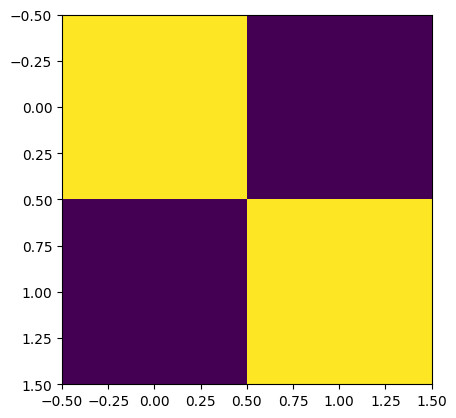

A covariance matrix:
[[2.08413157 0.20842107]
 [0.20842107 1.99542187]]


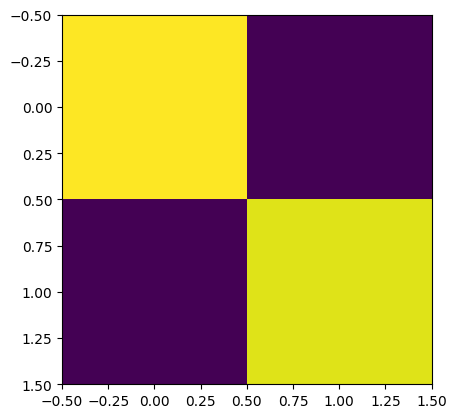

In [3]:
means = data.get_mean_vector()
print("Means:")
print(means)

rho = data.get_similarity_matrix()
print("A time-series similarity measure:")
print(rho)
plt.imshow(rho)
plt.show()

cov = data.get_covariance_matrix()
print("A covariance matrix:")
print(cov)
plt.imshow(cov)
plt.show()

If you wish, you can look into the underlying pseudo-random time-series using. Please note that the private class members (starting with underscore) may change in future releases of Qiskit.

The underlying evolution of stock prices:


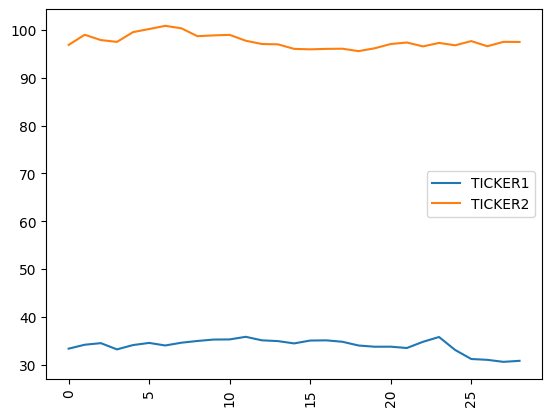

TICKER1
[33.345584192064784, 34.167202335565946, 34.49763941174933, 33.19448218014497, 34.099838046818086, 34.5462126191821, 34.009259383821814, 34.59037748801817, 34.95494988420424, 35.24908238085977, 35.27750462217556, 35.82421760878801, 35.08776352178634, 34.92485357379329, 34.442734261113316, 35.04158047374794, 35.0813025812296, 34.78884583026451, 34.00693736790767, 33.7497451272888, 33.757887307807145, 33.48228440250777, 34.77634821690598, 35.783072532211776, 33.07191005324581, 31.182896807278134, 31.008124715222973, 30.585934303646617, 30.799577301145227]
TICKER2
[96.8774156647853, 98.99525441983634, 97.88323365714406, 97.50562865001707, 99.5484002575094, 100.19510325371124, 100.85816662608751, 100.34416025440004, 98.69608508354439, 98.86354982776713, 98.97256391558868, 97.7452118613441, 97.06198519956354, 96.98994151983632, 96.04518989677554, 95.94691992892332, 96.04240295639278, 96.07798919344826, 95.57169753513395, 96.16544560691977, 97.0566125612021, 97.37746086576867, 96.559

In [4]:
print("The underlying evolution of stock prices:")
for (cnt, s) in enumerate(data._tickers):
    plt.plot(data._data[cnt], label=s)
plt.legend()
plt.xticks(rotation=90)
plt.show()

for (cnt, s) in enumerate(data._tickers):
    print(s)
    print(data._data[cnt])

Clearly, you can adapt the number and names of tickers and the range of dates: 

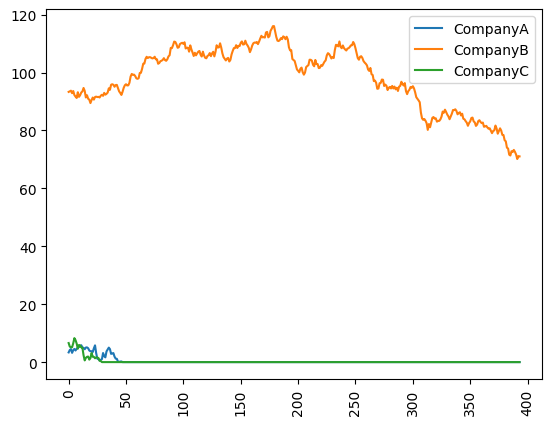

In [5]:
data = RandomDataProvider(
    tickers=["CompanyA", "CompanyB", "CompanyC"],
    start=datetime.datetime(2015, 1, 1),
    end=datetime.datetime(2016, 1, 30),
    seed=1,
)
data.run()
for (cnt, s) in enumerate(data._tickers):
    plt.plot(data._data[cnt], label=s)
plt.legend()
plt.xticks(rotation=90)
plt.show()

### Access to closing-price time-series

While the access to real-time data usually requires a payment, it is possible 
to access historical (adjusted) closing prices via Wikipedia and Nasdaq Data Link
free of charge, following registration at:
https://data.nasdaq.com/sign-up
In the code below, one needs to specify actual tickers of actual NASDAQ
issues and the access token you obtain from Nasdaq Data Link; by running the code below, you agree to the Nasdaq Data Link terms and 
conditions, including a liability waiver.
Notice that at least two tickers are required for the computation
of covariance and time-series matrices, but hundreds of tickers may go 
beyond the fair usage limits of Nasdaq Data Link.

In [6]:
stocks = ["GOOG", "AAPL"]

token = "REPLACE-ME"
if token != "REPLACE-ME":
    try:
        wiki = WikipediaDataProvider(
            token=token,
            tickers=stocks,
            start=datetime.datetime(2016, 1, 1),
            end=datetime.datetime(2016, 1, 30),
        )
        wiki.run()
    except QiskitFinanceError as ex:
        print(ex)
        print("Error retrieving data.")

Once the data are loaded, you can again compute the covariance matrix or its DTW variants.

In [7]:
if token != "REPLACE-ME":
    if wiki._data:
        if wiki._n <= 1:
            print(
                "Not enough wiki data to plot covariance or time-series similarity. Please use at least two tickers."
            )
        else:
            rho = wiki.get_similarity_matrix()
            print("A time-series similarity measure:")
            print(rho)
            plt.imshow(rho)
            plt.show()

            cov = wiki.get_covariance_matrix()
            print("A covariance matrix:")
            print(cov)
            plt.imshow(cov)
            plt.show()
    else:
        print("No wiki data loaded.")

If you wish, you can look into the underlying time-series using:

In [8]:
if token != "REPLACE-ME":
    if wiki._data:
        print("The underlying evolution of stock prices:")
        for (cnt, s) in enumerate(stocks):
            plt.plot(wiki._data[cnt], label=s)
        plt.legend()
        plt.xticks(rotation=90)
        plt.show()

        for (cnt, s) in enumerate(stocks):
            print(s)
            print(wiki._data[cnt])
    else:
        print("No wiki data loaded.")

### [Optional] Setup token to access recent, fine-grained time-series

If you would like to download professional data, you will have to set-up a token with one of the major providers. Let us now illustrate the data with NASDAQ Data on Demand, which can supply bid and ask prices in arbitrary resolution, as well as aggregates such as daily adjusted closing prices, for NASDAQ and NYSE issues.


If you don't have NASDAQ Data on Demand license, you can contact NASDAQ (cf. https://business.nasdaq.com/intel/GIS/Nasdaq-Data-on-Demand.html) to obtain a trial or paid license.

If and when you have access to NASDAQ Data on Demand using your own token, you should replace REPLACE-ME below with the token. 
To assure the security of the connection, you should also have your own means of validating NASDAQ's certificates. The DataOnDemandProvider constructor has an optional argument `verify`, which can be `None` or a string or a boolean. If it is `None`, certify certificates will be used (default). If verify is a string, it should be pointing to a certificate for the HTTPS connection to NASDAQ (dataondemand.nasdaq.com), either in the form of a CA_BUNDLE file or a directory wherein to look.


In [9]:
token = "REPLACE-ME"
if token != "REPLACE-ME":
    try:
        nasdaq = DataOnDemandProvider(
            token=token,
            tickers=["GOOG", "AAPL"],
            start=datetime.datetime(2016, 1, 1),
            end=datetime.datetime(2016, 1, 2),
        )
        nasdaq.run()
        for (cnt, s) in enumerate(nasdaq._tickers):
            plt.plot(nasdaq._data[cnt], label=s)
        plt.legend()
        plt.xticks(rotation=90)
        plt.show()
    except QiskitFinanceError as ex:
        print(ex)
        print("Error retrieving data.")

Another major vendor of stock market data is Exchange Data International (EDI), whose API can be used to query over 100 emerging and frontier markets that are Africa, Asia, Far East, Latin America and Middle East, as well as the more established ones. See:
https://www.exchange-data.com/
for an overview of the coverage.

The access again requires a valid access token to replace REPLACE-ME below. The token can be obtained on a trial or paid-for basis at:
https://data.nasdaq.com/sign-up

In [10]:
token = "REPLACE-ME"
if token != "REPLACE-ME":
    try:
        lse = ExchangeDataProvider(
            token=token,
            tickers=["AEO", "ABBY", "ADIG", "ABF", "AEP", "AAL", "AGK", "AFN", "AAS", "AEFS"],
            stockmarket=StockMarket.LONDON,
            start=datetime.datetime(2018, 1, 1),
            end=datetime.datetime(2018, 12, 31),
        )
        lse.run()
        for (cnt, s) in enumerate(lse._tickers):
            plt.plot(lse._data[cnt], label=s)
        plt.legend()
        plt.xticks(rotation=90)
        plt.show()
    except QiskitFinanceError as ex:
        print(ex)
        print("Error retrieving data.")

One can also access Yahoo Finance Data, no token needed, from Yahoo! Finance.

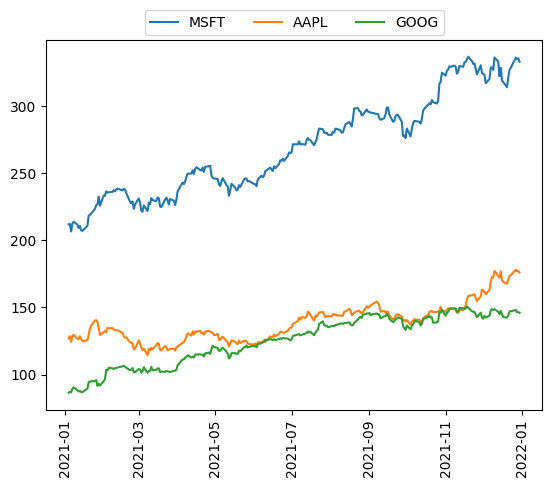

In [11]:
try:
    data = YahooDataProvider(
        tickers=["MSFT", "AAPL", "GOOG"],
        start=datetime.datetime(2021, 1, 1),
        end=datetime.datetime(2021, 12, 31),
    )
    data.run()
    for (cnt, s) in enumerate(data._tickers):
        plt.plot(data._data[cnt], label=s)
    plt.legend(loc="upper center", bbox_to_anchor=(0.5, 1.1), ncol=3)
    plt.xticks(rotation=90)
    plt.show()
except QiskitFinanceError as ex:
    data = None
    print(ex)

For the actual use of the data, please see the <a href="01_portfolio_optimization.ipynb">portfolio_optimization</a> or <a href="02_portfolio_diversification.ipynb">portfolio_diversification</a> notebooks. 

In [12]:
import qiskit.tools.jupyter

%qiskit_version_table
%qiskit_copyright

/tmp/ipykernel_4721/1492642725.py:1: DeprecationWarning: qiskit.tools.jupyter is deprecated and will be removed in Qiskit 1.0.0
  import qiskit.tools.jupyter
